
Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




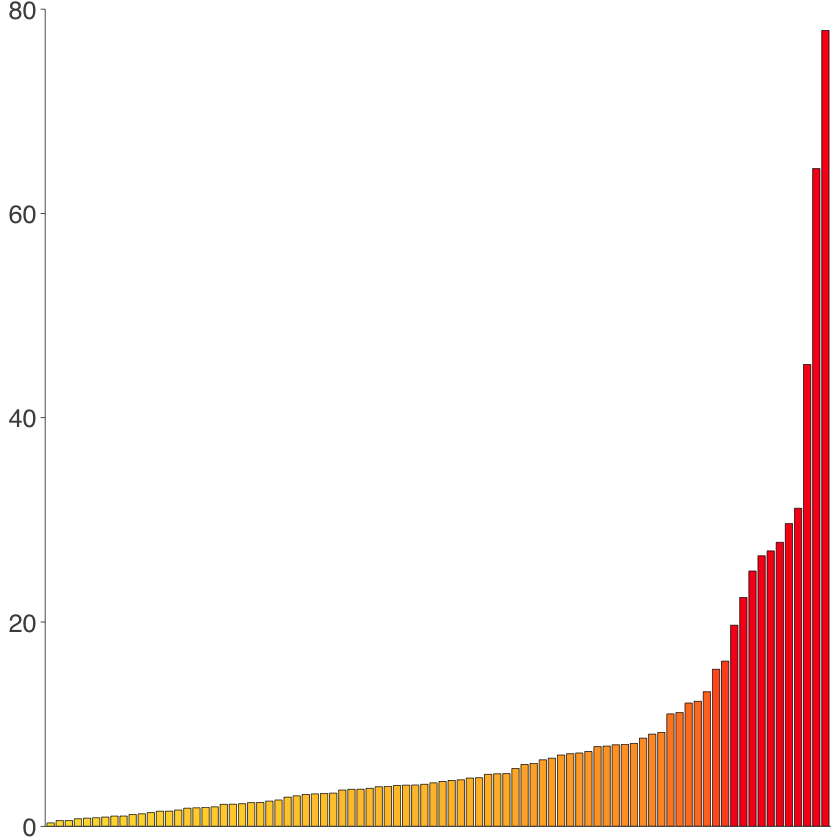

In [6]:
##### Load packages #####
library(tidyverse)
library(ggplot2)
library(cowplot)
# Load CSV
graphdata <- NULL
graphdata <- read.csv("raw_data/qPCR_LMM_wide.csv")
graphdata_long <- graphdata %>%
  gather(column, value)
# Make order factor
desired_order <- graphdata_long$column

# Preprocess the data to create a new column for fill color
graphdata_long <- graphdata_long %>%
  mutate(fill_color = ifelse(startsWith(column, "flg"), "black", as.character(value)))

bar_plot <- ggplot(graphdata_long, aes(x = factor(column, levels = desired_order), y = value, fill = value)) +
  geom_bar(stat = "identity", width = 0.8, position = "dodge", color = "black", linewidth = 0.2) +
  scale_fill_gradient(low = "#FFE13C", high = "#F8081B", limits = c(0, 20), na.value = "#F8081B") + 
  scale_y_continuous(
    expand = c(0, 0),
    limits = c(0, 80),
    breaks = seq(0, max(graphdata_long$value) * 1.1, by = 20),
  ) +   
  theme_minimal() +
  theme(
    axis.line = element_line(color = "black", linewidth = 0.2),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.title = element_blank(),
    legend.text = element_blank(),
    legend.box = element_blank(),
    legend.key = element_blank(),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.ticks.y = element_line(color = "black", linewidth = 0.2),
    text = element_text(family = "Helvetica", size = 19)
  ) +
  guides(fill = "none")

print(bar_plot)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


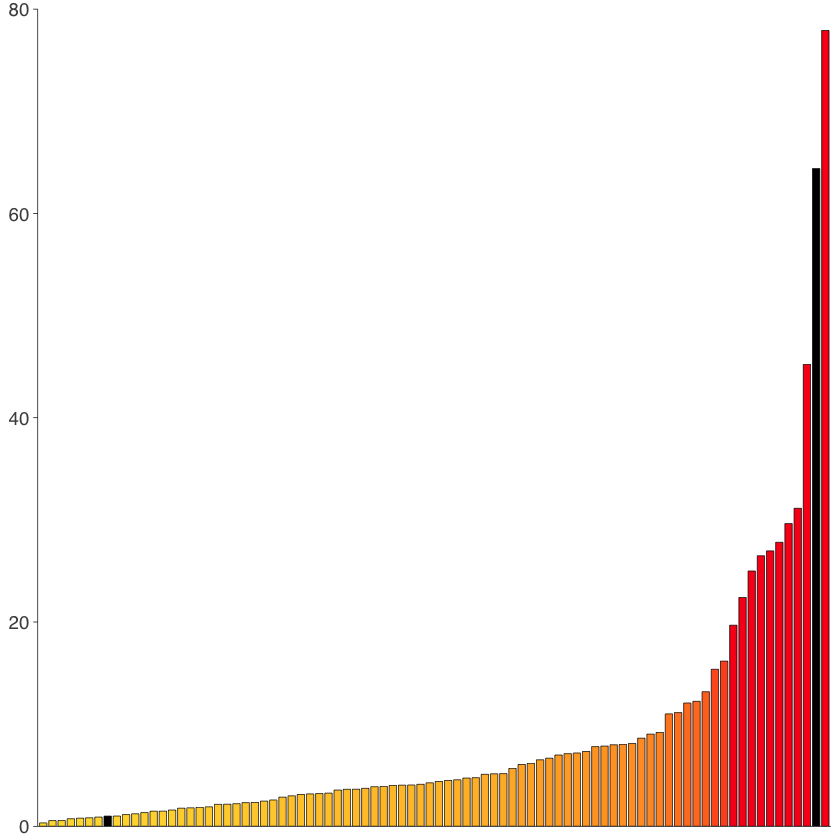

In [2]:
# Extract color information
plot_data <- ggplot_build(bar_plot)
bar_colors <- plot_data$data[[1]]$fill
# Change the color of the 8th and 85th bars to black
bar_colors[c(8, 85)] <- "#000000"

# Redraw the bar plot with updated colors
updated_bar_plot <- ggplot(graphdata_long, aes(x = factor(column, levels = desired_order), y = value)) +
  geom_bar(stat = "identity", width = 0.8, position = "dodge", aes(fill = factor(column, levels = desired_order)), color = "black", size = 0.2) +
  scale_fill_manual(values = bar_colors) +
  scale_y_continuous(
    expand = c(0, 0),  # Set expand to 0 to move x-axis to y=0
    limits = c(0, 80),
    breaks = seq(0, max(graphdata_long$value) * 1.1, by = 20),  # Specify y-axis tick positions
  ) +   
  theme_minimal() +
  theme(
    axis.line = element_line(color = "black", linewidth = 0.2),
    axis.text.x = element_blank(),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    legend.title = element_blank(),
    legend.text = element_blank(),
    legend.box = element_blank(),
    legend.key = element_blank(),
    panel.background = element_blank(),
    panel.grid = element_blank(),
    axis.ticks.y = element_line(color = "black", linewidth = 0.2),  # Add y-axis tick marks
    text = element_text(color = "black", family = "Helvetica", size = 14)  # Change font family and size
  ) +
  guides(fill = FALSE)

print(updated_bar_plot)

In [3]:
# Set the file path and name for saving the heatmap
plot_final <- "Final/Fig1B_revised.tif"

# Open the TIFF device with high resolution and DPI
tiff(plot_final, width = 18, height = 5, res = 600, units = "cm")
updated_bar_plot
dev.off()

# make color info csv
cinfo<-NULL
cinfo <- data.frame(desired_order,bar_colors)
write.csv(cinfo, "Final/Fig1B_color.csv", row.names = FALSE)


pdf 
  2

In [8]:
# Create a plot just for the legend with a horizontal orientation
legend_plot <- ggplot(graphdata_long, aes(x = factor(column, levels = desired_order), y = value, fill = value)) +
  geom_bar(stat = "identity", width = 0.8, position = "dodge", color = "black", linewidth = 0.2) +
  scale_fill_gradient(low = "#FFE13C", high = "#F8081B", limits = c(0, 20), na.value = "#F8081B") + 
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    legend.text = element_text(family = "Helvetica", size = 19),
    legend.key.height = unit(0.5, "cm"),
    legend.key.width = unit(2, "cm"),
    legend.position = "bottom",
    legend.direction = "horizontal"
  ) +
  guides(fill = guide_colorbar(title = NULL, barwidth = 10, barheight = 1))

# Extract the legend as a separate plot
legend <- cowplot::get_legend(legend_plot)

# Save the legend as a TIFF file
tiff("color_legend.tiff", width = 6, height = 2, units = "in", res = 300)
grid::grid.draw(legend)
dev.off()


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


pdf 
  2

In [9]:
# Extract the legend from the original plot
legend_plot <- ggplot(graphdata_long, aes(x = factor(column, levels = desired_order), y = value, fill = value)) +
  geom_bar(stat = "identity", width = 0.8, position = "dodge", color = "black", linewidth = 0.2) +
  scale_fill_gradient(low = "#FFE13C", high = "#F8081B", limits = c(0, 20), na.value = "#F8081B") + 
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    legend.text = element_text(family = "Helvetica", size = 19),
    legend.key.height = unit(1, "cm"),
    legend.key.width = unit(0.5, "cm")
  )

# Extract the legend as a separate plot
legend <- cowplot::get_legend(legend_plot)

# Save the legend as a TIFF file
tiff("final/color_legend.tiff", width = 2, height = 4, units = "in", res = 300)
grid::grid.draw(legend)
dev.off()


Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


pdf 
  2